### Data Visualization: Shots 
In this notebook we will try to extract insights out of shots data of the World Cup 2022.

1. Shots Map 

##### Imports 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from mplsoccer import VerticalPitch, pitch, FontManager 

font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')

In [2]:
#Read shots data
df= pd.read_parquet('../data/shots.parquet')

1. Shots Map

In [7]:
# Filter data 
df[['X', 'Y']]= pd.DataFrame(df.location.to_list(), index= df.index) # Add shots locaiton (X,Y)
df= df.loc[(df.period!=5) & (df.shot_type!= 'Penalty')] # Exclude penalty shoot-outs shots
df.shot_outcome.replace({'Goal': 1}, inplace= True) # Asign 1 to 'Goal'
df.shot_outcome[df.shot_outcome!= 1]= 0 

# Players cumulative xG and numbre of goals
DF= df.groupby(['player_id', 'player'])\
        .agg({'shot_statsbomb_xg': 'sum', 'shot_outcome': 'sum', 'type': 'count'})\
        .sort_values(by='shot_statsbomb_xg', ascending= False).reset_index()
DF.rename(columns= {'shot_statsbomb_xg': 'xG', 'shot_outcome': 'num_goal', 'type': 'num_shot'}, inplace=True)
DF.head(3)

,player_id,player,xG,num_goal,num_shot
0,3604,Olivier Giroud,3.035955,4,17
1,3009,Kylian Mbappé Lottin,2.666252,6,29
2,5545,Breel-Donald Embolo,2.391197,2,6


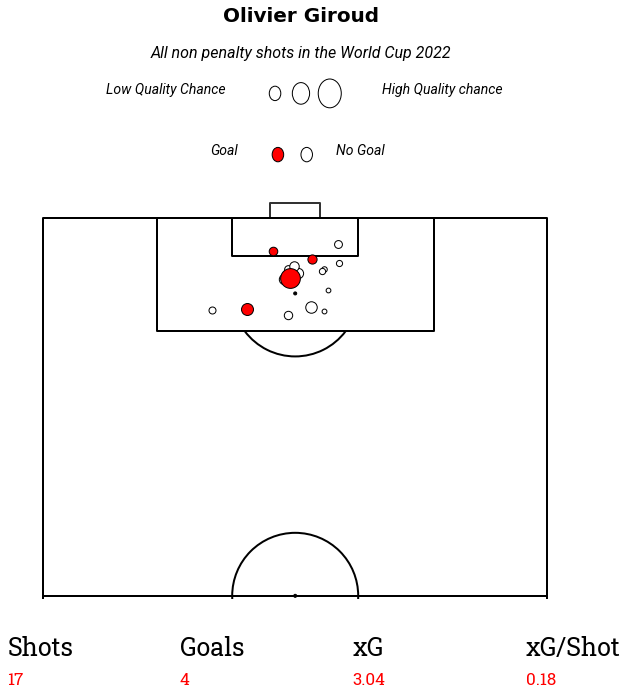

In [104]:
#Plotting
pitch = VerticalPitch(pitch_type= 'statsbomb',pad_bottom=0.5, half= True, goal_type= 'box', goal_alpha=0.8,  line_color='black') 
fig, ax = pitch.draw(figsize=(8, 10))
fig.set_facecolor('white')

df1= df.loc[df['player']== DF.player[0]]

result= df1['shot_outcome'].values.tolist()
X_s= df1['X'].values.tolist()
Y_s= df1['Y'].values.tolist()
xG_s= df1['shot_statsbomb_xg'].values.tolist()

# Scatter shots 
for r, x, y, xG in zip(result, X_s, Y_s, xG_s):
    if r == 1:
        pitch.scatter(x, y, c='red', s=xG*500 ,
                      edgecolors='black', ax=ax)
    else:
        pitch.scatter(x, y, c='white', s=xG*500 ,
                      edgecolors='black', ax=ax)
        

# Additional information
fig.text(0, 0.14, s= 'Shots', fontsize=25, color='black',fontproperties= font_bold.prop)
shots= DF.num_shot[0]
fig.text(0, 0.1, s= shots, fontsize=17 , color='red', fontproperties= font_bold.prop)

fig.text(0.3, 0.14, s= 'Goals', fontsize=25, color='black',fontproperties= font_bold.prop)
fig.text(0.3, 0.1, s= str(DF.num_goal[0]), fontsize=17, color='red',fontproperties= font_bold.prop)

fig.text(0.6, 0.14, s= 'xG', fontsize=25, color='black',fontproperties= font_bold.prop)
xG= round(DF.xG[0],2)
fig.text(0.6, 0.1, s= xG, fontsize=17, color='red',fontproperties= font_bold.prop)

fig.text(0.9, 0.14, s= 'xG/Shot', fontsize=25, color='black',fontproperties= font_bold.prop)
fig.text(0.9, 0.1, s= round(xG/shots, 2), fontsize=17, color='red',fontproperties= font_bold.prop)

fig.patches.extend([
    plt.Circle(
        (0.465, 0.92),0.01, fill=True, color="white", ec= 'black', lw=1,
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.51, 0.92), 0.015, fill=True, color="white", ec= 'black', lw=1,
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.56, 0.92), 0.02, fill=True, color="white", ec= 'black', lw=1,
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.52, 0.835), 0.01, fill=True, color="white", ec= 'black', lw=1,
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.47, 0.835), 0.01, fill=True, color="red", ec= 'black', lw=1,
        transform=fig.transFigure, figure=fig
    ),
])

# Expected goal legend
fig.text(0.38, 0.92, 'Low Quality Chance', fontsize=14, color='black',fontproperties= font_italic.prop, ha='right')
fig.text(0.65, 0.92, 'High Quality chance', fontsize=14, color='black',fontproperties= font_italic.prop, ha='left')

# Goal/No Goal legend
fig.text(0.4, 0.835, 'Goal', fontsize=14, color='black',fontproperties= font_italic.prop, ha='right')
fig.text(0.57, 0.835, 'No Goal', fontsize=14, color='black',fontproperties= font_italic.prop, ha='left')

# Set titles
name= DF.player[0]
fig.text(0.51, 1.02, name, fontsize=20, ha= 'center', fontweight= 'bold', color='black')
subtitle= 'All non penalty shots in the World Cup 2022'
fig.text(0.51, .97, subtitle, fontsize=16, ha= 'center', fontweight= 'bold', fontproperties= font_italic.prop, color='black')

# Save plot
fig.savefig("../Plots/passes-4.png", dpi= 150, bbox_inches='tight')